In [113]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Current Data
The file I've been collecting data in on a raspberry pi:

In [114]:
file = 'Covidiot2.csv'

In [115]:
covid_df = pd.read_csv(file, sep='\t', usecols=['datetime', 'USA', 'Canada', 'Mexico', 'Italy', 'France', 
                                              'Germany', 'Spain', 'UK', 'Japan', 'S. Korea', 'India', 
                                              'Philippines', 'Brazil', 'Venezuela', 'Peru', 'South Africa', 
                                              'Egypt', 'Nigeria', 'Ethiopia', 'Iran', 'Israel', 'Australia'])

In [116]:
covid_df['datetime'] = pd.to_datetime(covid_df['datetime'])

In [117]:
covid_df.tail()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Brazil,Venezuela,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia
96,2020-07-06 20:18:26.082492,0.900463,0.280678,0.199211,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.763685,0.025211,0.927163,0.346865,0.074483,0.013928,0.005085,0.289371,0.355252,0.032922
97,2020-07-07 05:15:04.575527,0.904026,0.280678,0.203013,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.764996,0.026062,0.927163,0.346865,0.074483,0.014207,0.005085,0.289371,0.361283,0.033671
98,2020-07-07 17:15:04.055501,0.914938,0.280678,0.203013,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.773214,0.026062,0.927163,0.346865,0.074483,0.014207,0.005085,0.292510,0.361283,0.033671
99,2020-07-08 05:15:04.005969,0.920860,0.281261,0.207866,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.787853,0.026062,0.938006,0.363952,0.075516,0.014207,0.005085,0.292510,0.361283,0.034333
100,2020-07-08 17:15:03.981648,0.929620,0.281825,0.207866,0.400499,0.259635,0.237028,0.540080,0.422737,0.015951,...,0.805968,0.027054,0.949025,0.363952,0.075516,0.014451,0.005085,0.295714,0.377955,0.034098


# Linear Prediction of U.S. Covid-19 Rate:

### Date 
Instead of datetime, the dates are converted into days from the start date of data collection (4/28/20). This format can more easily be applied to regression models. 

In [118]:
start_date = datetime.datetime(year=2020, month=4, day=28)
covid_df['4/28'] = start_date
covid_df['days from 4/28'] = (covid_df['datetime'] - covid_df['4/28']).dt.days

### Sklearn Regression
The linear regression class learns from the existing US rate/dates

In [119]:
X_train = covid_df[['days from 4/28']]
Y_train = covid_df[['USA']]

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The same x values are used by the predict method to determine linear y values

In [120]:
y_prediction = regressor.predict(covid_df[['days from 4/28']])
y_pred = pd.DataFrame(y_prediction)

The result is then added to a DataFrame with the original US rates

In [121]:
predict_array = covid_df['USA']
predict_array = pd.concat([predict_array, y_pred], axis=1, join='outer')
predict_array.head()

,USA,0
0,0.3124,0.309386
1,0.3124,0.309386
2,0.3129,0.317022
3,0.3188,0.317022
4,0.3216,0.324658


### Graph and RMSE

<function matplotlib.pyplot.show(*args, **kw)>

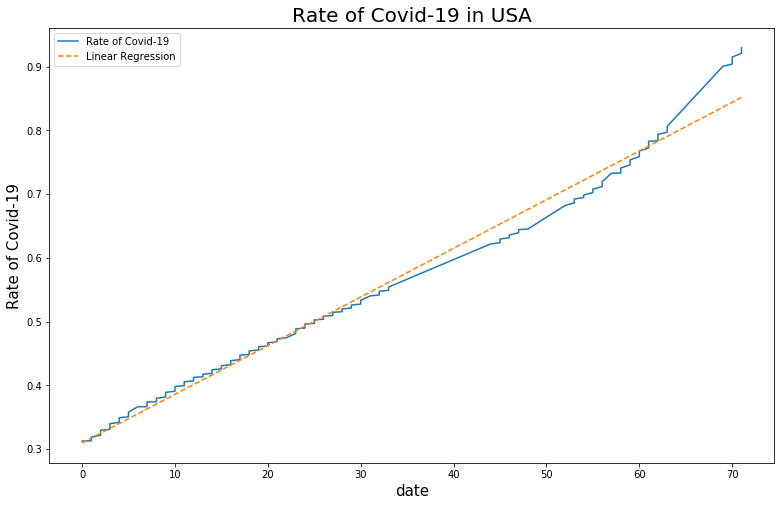

In [122]:
plt.figure(figsize=(13,8))

plt.plot(covid_df['days from 4/28'], predict_array['USA'], '-', covid_df['days from 4/28'], predict_array[0], '--')
    
plt.legend(('Rate of Covid-19', 'Linear Regression'), loc='upper left')
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.xlabel('date', fontsize=15)
plt.title('Rate of Covid-19 in USA', fontsize=20)

plt.show

In [123]:
lin_RMSE = sqrt(mean_squared_error(y_true=covid_df['USA'], y_pred=y_pred))
lin_RMSE

0.019650177367077384

# Polynomial Prediction of U.S. Covid-19 Rate:

In [124]:
covid_df.tail()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia,4/28,days from 4/28
96,2020-07-06 20:18:26.082492,0.900463,0.280678,0.199211,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.927163,0.346865,0.074483,0.013928,0.005085,0.289371,0.355252,0.032922,2020-04-28,69
97,2020-07-07 05:15:04.575527,0.904026,0.280678,0.203013,0.399953,0.257892,0.236399,0.538531,0.420953,0.015635,...,0.927163,0.346865,0.074483,0.014207,0.005085,0.289371,0.361283,0.033671,2020-04-28,70
98,2020-07-07 17:15:04.055501,0.914938,0.280678,0.203013,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.927163,0.346865,0.074483,0.014207,0.005085,0.292510,0.361283,0.033671,2020-04-28,70
99,2020-07-08 05:15:04.005969,0.920860,0.281261,0.207866,0.400180,0.258619,0.236746,0.539260,0.421809,0.015635,...,0.938006,0.363952,0.075516,0.014207,0.005085,0.292510,0.361283,0.034333,2020-04-28,71
100,2020-07-08 17:15:03.981648,0.929620,0.281825,0.207866,0.400499,0.259635,0.237028,0.540080,0.422737,0.015951,...,0.949025,0.363952,0.075516,0.014451,0.005085,0.295714,0.377955,0.034098,2020-04-28,71


## Numpy Polyfit


20 days from the last date od data collection sets the limits for the projection

In [125]:
max_date = covid_df['days from 4/28'].max() + 20
max_date

91

numpy.polyfit determines the best fit third order polynomial

In [126]:
curve = np.poly1d(np.polyfit(covid_df['days from 4/28'], covid_df['USA'], 3)) #third order polynomial
lin_line = np.linspace(0, max_date, 200)

### Graph and RMSE

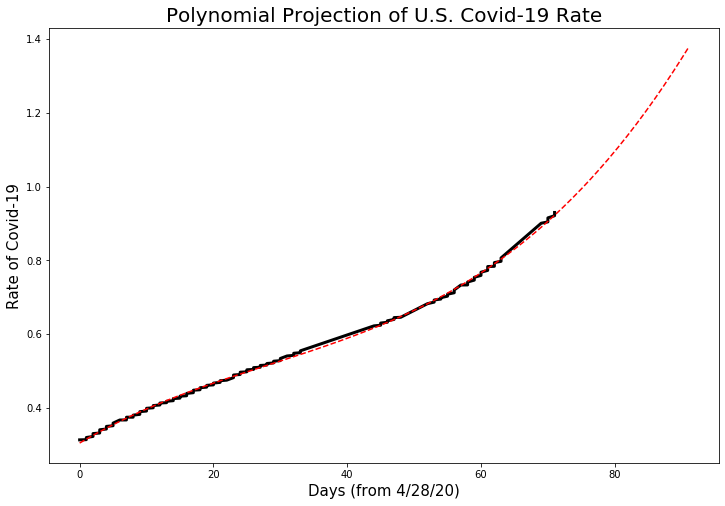

In [127]:
plt.figure(figsize=(12, 8))
plt.plot(covid_df['days from 4/28'], covid_df['USA'], linewidth=3, color='k')
plt.plot(lin_line, curve(lin_line), '--', color='r')
plt.xlabel('Days (from 4/28/20)', fontsize=15)
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.title('Polynomial Projection of U.S. Covid-19 Rate', fontsize=20)
plt.show()

In [128]:
Poly_RMSE = sqrt(mean_squared_error(y_true=us_rates, y_pred=curve(covid_df['days from 4/28'])))
Poly_RMSE

0.004913036101020562

## Summary of Projections:

In [129]:
print('Linear Projection RMSE: ' + str(lin_RMSE))
print('Polynomial Projection RMSE: ' + str(Poly_RMSE))
if Poly_RMSE < lin_RMSE:
    print('The polynomial projection is a better fit')
else:
    print('The linear projection is a better fit')

Linear Projection RMSE: 0.019650177367077384
Polynomial Projection RMSE: 0.004913036101020562
The polynomial projection is a better fit
